In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import os

In [32]:
files = os.listdir("/Users/mekari/Code/uber/uber-pickups-in-new-york-city/uber")
files

['uber-raw-data-janjune-15.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [33]:
files.remove("uber-raw-data-janjune-15.csv")
files.remove("Uber-Jan-Feb-FOIL.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [34]:
path = r'/Users/mekari/Code/uber/uber-pickups-in-new-york-city/uber'

final = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+"/"+file, encoding="utf-8")
    final = pd.concat([final, df])

In [35]:
final.shape

(4534327, 4)

In [36]:
df = final.copy()

In [37]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [38]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [39]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

In [40]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [41]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [42]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour

In [43]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [44]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [45]:
!pip install plotly

#### Analysis of journey by Week-days

In [46]:
import plotly.express as px

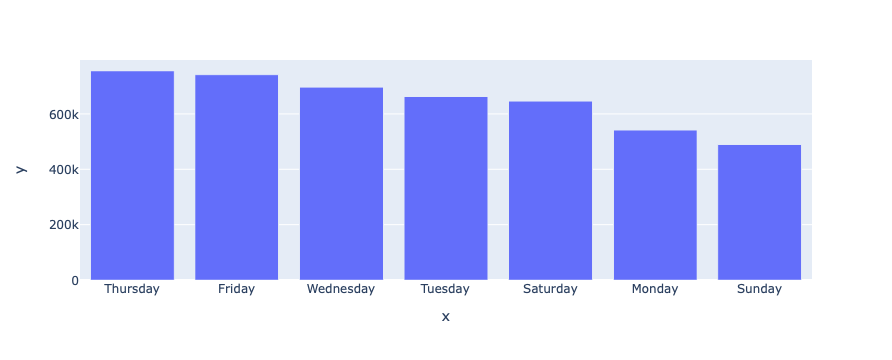

In [47]:
px.bar(x=df['weekday'].value_counts().index,y=df['weekday'].value_counts())

### Analysis by Hour

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

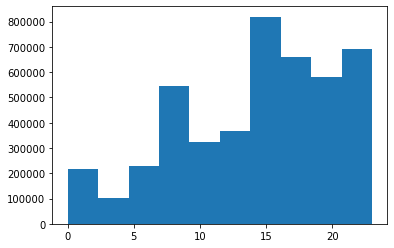

In [48]:
plt.hist(df['hour'])

In [49]:
df['month'].unique()

array([4, 8, 9, 7, 6, 5])

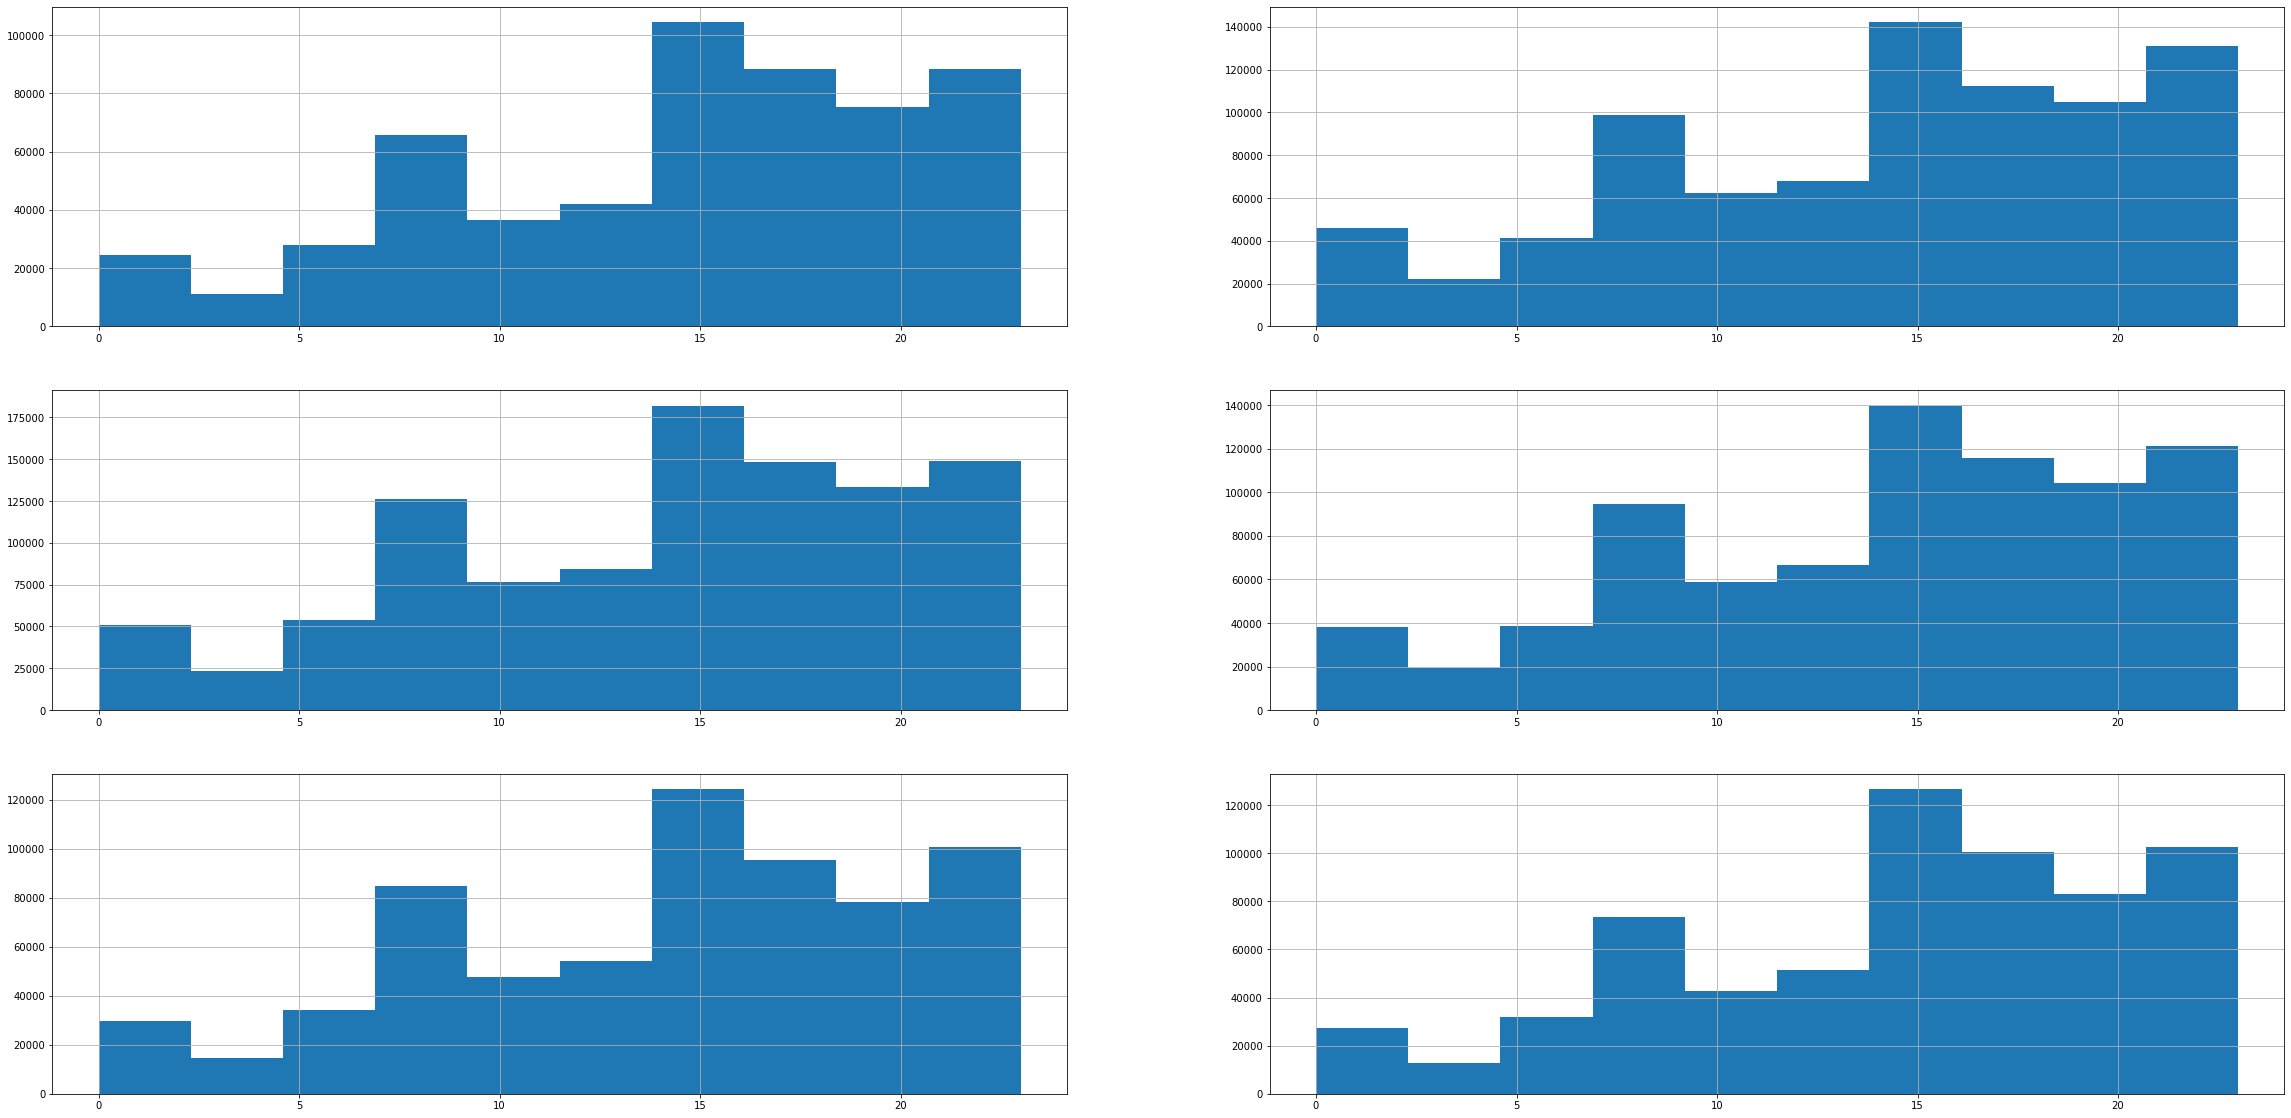

In [50]:
plt.figure(figsize=(40,20))

for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2, i+1)
    df[df['month'] == month]['hour'].hist()

#### Analysis of Rush of each hour in each month

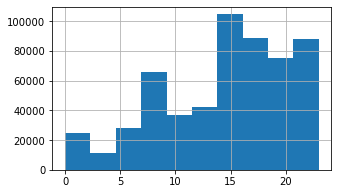

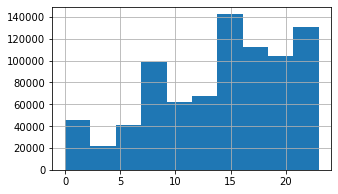

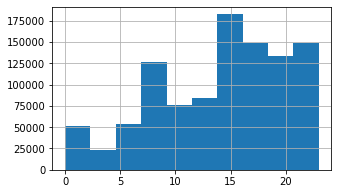

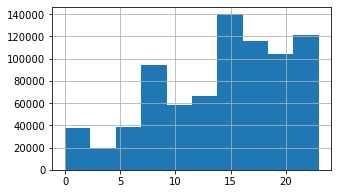

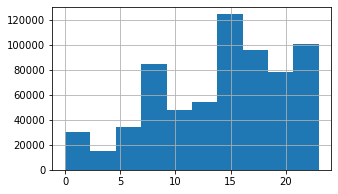

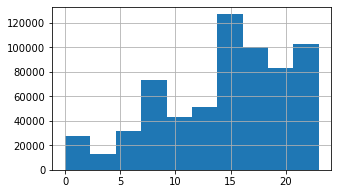

In [51]:
for i in df['month'].unique():
    plt.figure(figsize=(5,3))
    df[df['month']==i]['hour'].hist()
    

In [52]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


#### analysis of which month has max rides

In [53]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [54]:
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

In [55]:
trace1 = go.Bar(x=df.groupby('month')['hour'].count().index, 
       y=df.groupby('month')['hour'].count(),
       name= 'Priority'
      )

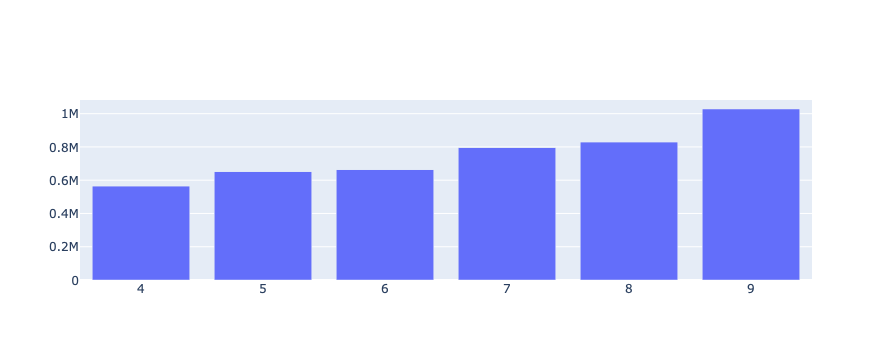

In [56]:
iplot([trace1])

#### Analysis of Journey (Each  Day)

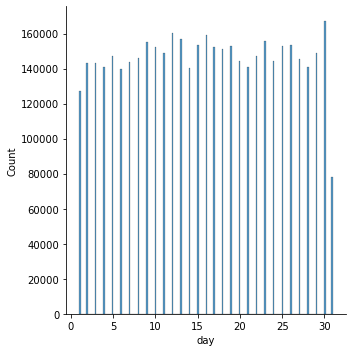

In [57]:
sns.displot(df['day'])

Text(0.5, 1.0, 'Journeys by month day')

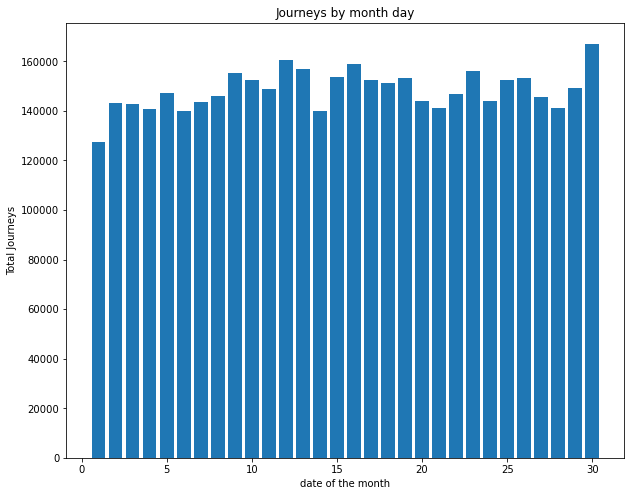

In [58]:
plt.figure(figsize=(10,8))
plt.hist(df['day'], bins=30, rwidth=0.8, range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by month day')